In [7]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import cm
mpl.rcParams['figure.dpi'] = 120

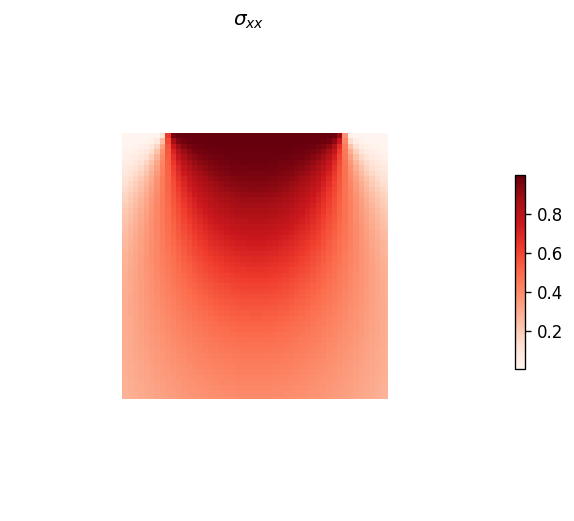

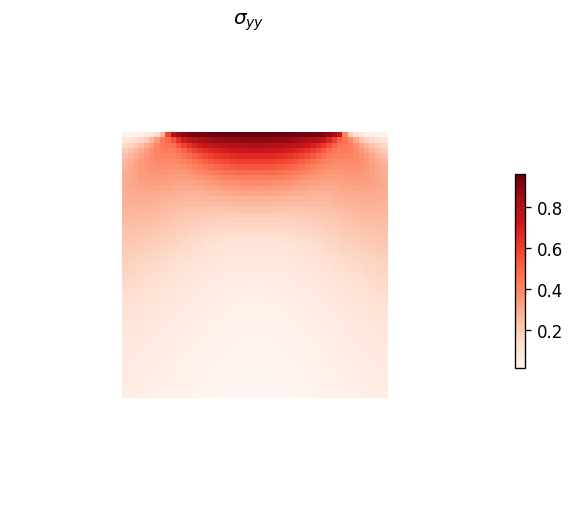

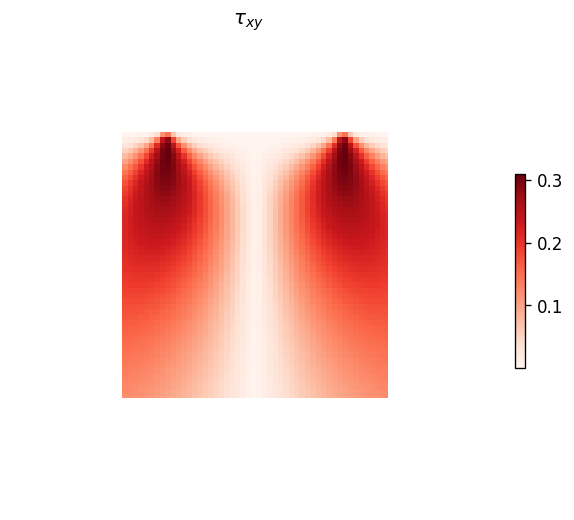

In [18]:
an_s = 3
al_s = 3
ini_carga = -1
fin_carga = 1
Q = 1
color = cm.Reds

nx, ny = (100, 100)

x = np.linspace(0, an_s, nx)
y = np.linspace(0, al_s, ny)
X, Y = np.meshgrid(x, y)
X = X - an_s/2
sxx = np.zeros(np.shape(X))
syy = np.zeros(np.shape(X))
txy = np.zeros(np.shape(X))



for i in range(np.shape(X)[0]):
  for j in range(np.shape(X)[1]):
    r1 = np.sqrt( (X[i,j] - fin_carga)**2 + Y[i,j]**2 )
    if X[i,j] >= fin_carga:
      a1 = np.arccos( (X[i,j] - fin_carga)/r1 )

    else:
      a1 = np.arccos( Y[i,j]/r1 )+np.pi/2

    r2 = np.sqrt( (X[i,j] - ini_carga)**2 + Y[i,j]**2 )
    if X[i,j] >= ini_carga:
      a2 = np.pi/2 - np.arccos( Y[i,j]/r2 )

    else:
      a2 = np.arccos( Y[i,j]/r2 )+np.pi/2

    syy[i,j] = -Q * (a2 - a1 + 0.5*( np.sin(2*a2) - np.sin(2*a1) )) / np.pi
    sxx[i,j] = -Q * (a2 - a1 - 0.5*( np.sin(2*a2) - np.sin(2*a1) )) / np.pi
    txy[i,j] = np.abs(0.5*Q * ( np.cos(2*a2) - np.cos(2*a1) ) / np.pi)


fig = plt.figure(figsize=(14,7))
ax = fig.add_subplot(122, projection='3d', proj_type = 'ortho')
ax.view_init(azim=-90, elev=-90)
surf = ax.plot_surface(X, Y, sxx, cmap=color,
                       linewidth=0, antialiased=False)
ax.set_title('$\sigma_{xx}$')
fig.colorbar(surf, shrink=0.3)
ax.set_aspect('equalxy', 'box')
ax._axis3don = False

#syy
fig = plt.figure(figsize=(14,7))
ax = fig.add_subplot(122, projection='3d', proj_type = 'ortho')
ax.view_init(azim=-90, elev=-90)
surf = ax.plot_surface(X, Y, syy, cmap=color,
                       linewidth=0, antialiased=False)
ax.set_title('$\sigma_{yy}$')
fig.colorbar(surf, shrink=0.3)
ax.set_aspect('equalxy', 'box')
ax._axis3don = False

#txy
fig = plt.figure(figsize=(14,7))
ax = fig.add_subplot(122, projection='3d', proj_type = 'ortho')
ax.view_init(azim=-90, elev=-90)
surf = ax.plot_surface(X, Y, txy, cmap=color,
                       linewidth=0, antialiased=False)
ax.set_title('$\\tau_{xy}$')
fig.colorbar(surf, shrink=0.3)
ax.set_aspect('equalxy', 'box')
ax._axis3don = False

In [21]:
C = 0.5*(sxx + syy)
R = np.sqrt( (0.5*(sxx - syy))**2 + txy**2)
s1 = C + R
s2 = C - R


In [22]:
%matplotlib inline

<ipython-input-23-b3fa3dedfd34>:4: UserWarning: The following kwargs were not used by contour: 'linewidth'
  surf = ax.contour(X, Y, s1, cmap=color, levels = 15,


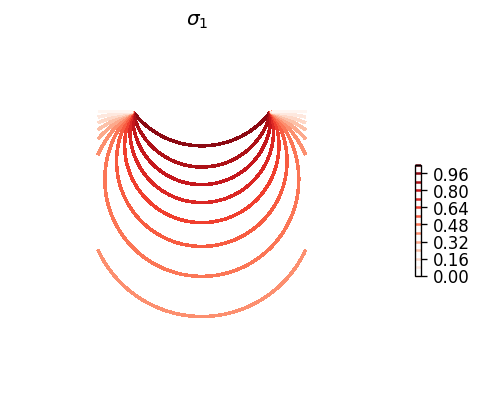

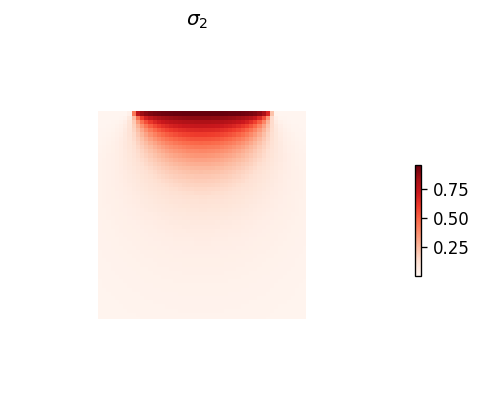

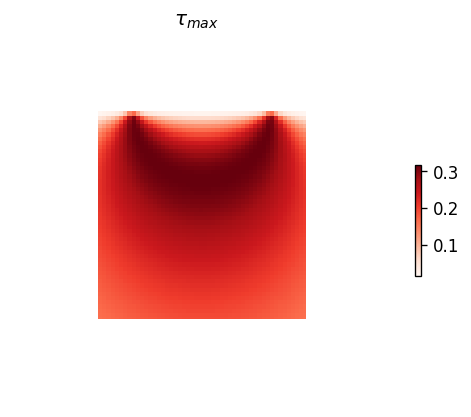

In [23]:
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(122, projection='3d', proj_type = 'ortho')
ax.view_init(azim=-90, elev=-90)
surf = ax.contour(X, Y, s1, cmap=color, levels = 15,
                       linewidth=1, antialiased=False)
ax.set_title('$\sigma_{1}$')
fig.colorbar(surf, shrink=0.3)
ax.set_aspect('equalxy', 'box')
ax._axis3don = False

fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(122, projection='3d', proj_type = 'ortho')
ax.view_init(azim=-90, elev=-90)
surf = ax.plot_surface(X, Y, s2, cmap=color,
                       linewidth=0, antialiased=False)
ax.set_title('$\sigma_{2}$')
fig.colorbar(surf, shrink=0.3)
ax.set_aspect('equalxy', 'box')
ax._axis3don = False

fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(122, projection='3d', proj_type = 'ortho')
ax.view_init(azim=-90, elev=-90)
surf = ax.plot_surface(X, Y, R, cmap=color,
                       linewidth=0, antialiased=False)
ax.set_title('$\\tau_{max}$')
fig.colorbar(surf, shrink=0.3)
ax.set_aspect('equalxy', 'box')
ax._axis3don = False